In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Part 2

In [2]:
csv_path = './final_part_2_data.csv'
litter_df = pd.read_csv(csv_path)

In [3]:
# plotting variables
font_labels = {'family': 'Arial', 'color': 'black', 'size': 14}
font_titles = {'family': 'Arial', 'color': 'black', 'size': 16}
cmap = plt.get_cmap('winter')
colors = cmap(np.linspace(0, 1, len(litter_df)))  # one RGBA color per
# categorical variables for bar charts
species = litter_df['Tree species']
species_short = [i.split()[0] for i in species]
positions = np.arange(len(species))
bar_width = 0.25

In [4]:
# percent ratios
litter_df['C:N'] = litter_df['C'] / litter_df['N']
litter_df['C:P'] = litter_df['C'] / litter_df['P']
litter_df['N:P'] = litter_df['N'] / litter_df['P']

In [5]:
# Calculate error or remaining nutrients after decomposition experiments
A_C = 1 - litter_df['C Release'] / 100
sigma_A_C = litter_df['C rel std. err'] / 100   
sigma_B_C = litter_df['C std. err']             # absolute std. err in same units as C

C_err = np.sqrt( (sigma_A_C * litter_df['C'])**2 + (A_C * sigma_B_C)**2 )

# Repeat for N and P
A_N = 1 - litter_df['N Release'] / 100
sigma_A_N = litter_df['N rel std. err'] / 100
sigma_B_N = litter_df['N std. Err']

N_err = np.sqrt( (sigma_A_N * litter_df['N'])**2 + (A_N * sigma_B_N)**2 )

A_P = 1 - litter_df['P Release'] / 100
sigma_A_P = litter_df['P rel std. err'] / 100
sigma_B_P = litter_df['P std. Err']

P_err = np.sqrt( (sigma_A_P * litter_df['P'])**2 + (A_P * sigma_B_P)**2 )

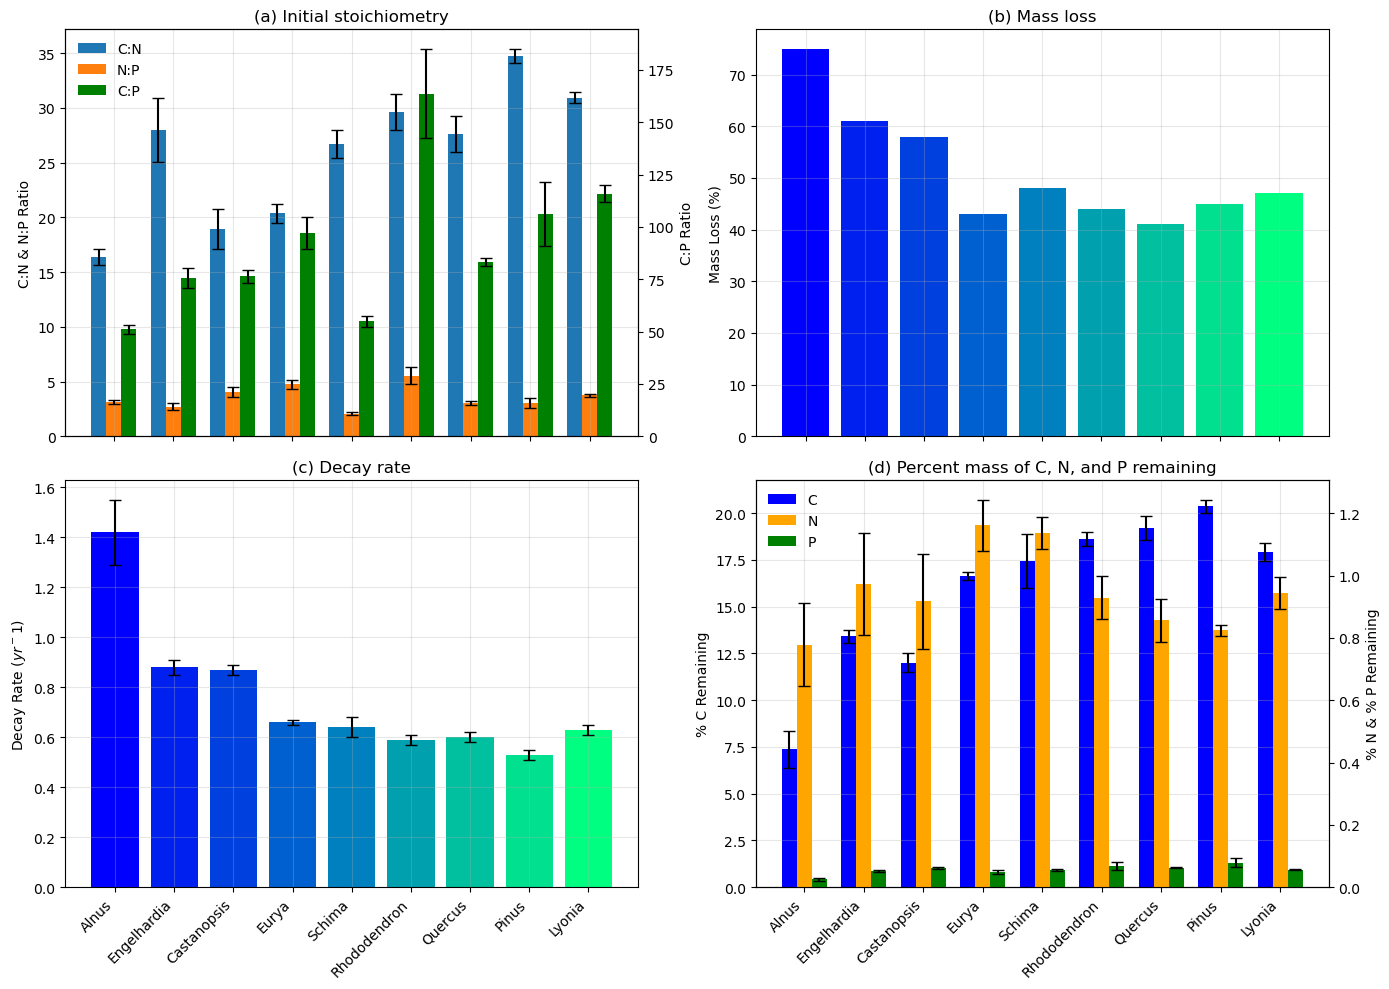

In [6]:
# ----------------------------------------------------
# Figure layout
# ----------------------------------------------------
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
ax1, ax2, ax3, ax4 = axes.flatten()
# ----------------------------------------------------
# Panel 1 — Initial Stoichiometry by tree species
# ----------------------------------------------------
CN_err = np.sqrt(((litter_df['C std. err'] / litter_df['C'])**2)+((litter_df['N std. Err'] / litter_df['N'])**2))
CP_err = np.sqrt(((litter_df['C std. err'] / litter_df['C'])**2)+((litter_df['P std. Err'] / litter_df['P'])**2))
NP_err = np.sqrt(((litter_df['N std. Err'] / litter_df['N'])**2)+((litter_df['P std. Err'] / litter_df['P'])**2))

ax1.bar(positions - bar_width, litter_df["C:N"], width=bar_width, yerr=litter_df["C:N"]*CN_err, capsize=4, label='C:N')
ax1.bar(positions, litter_df["N:P"], width=bar_width, yerr=litter_df["N:P"]*NP_err, capsize=4, label='N:P')
ax1_sec = ax1.twinx() 
ax1_sec.bar(positions + bar_width, litter_df["C:P"], width=bar_width, yerr=litter_df["C:P"]*CP_err, capsize=4, label='C:P', color='green')


ax1.set_xticks(positions)
ax1.tick_params(axis='x', labelbottom=False)
ax1.set_ylabel('C:N & N:P Ratio')
ax1_sec.set_ylabel('C:P Ratio')
ax1.set_title('(a) Initial stoichiometry')
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax1_sec.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, frameon=False, loc='upper left')
#ax1.legend(frameon=False)
#ax1_sec.legend()
# ----------------------------------------------------
# Panel 2 — Litter Mass loss by Tree species
# ----------------------------------------------------
ax2.bar(litter_df["Tree species"], litter_df["Litter Mass Loss"], color=colors)
ax2.set_xticks(positions)
ax2.tick_params(axis='x', labelbottom=False)
ax2.set_ylabel("Mass Loss (%)")
ax2.set_title("(b) Mass loss")
# ----------------------------------------------------
# Panel 3 — Decay Rate by Tree Species
# ----------------------------------------------------
ax3.bar(litter_df["Tree species"], litter_df["K"], yerr=litter_df['K std. Err'], capsize=4, color=colors)
ax3.set_xticks(positions)
ax3.set_xticklabels(species_short, rotation=45, ha='right')
ax3.set_ylabel("Decay Rate ${(yr^-1)}$")
ax3.set_title("(c) Decay rate")
# ----------------------------------------------------
# Panel 4 — Final Nutrient Percentages Remaining by tree species
# ----------------------------------------------------
c_vals = (1 - (litter_df['C Release'] / 100)) * litter_df['C']
n_vals = (1 - (litter_df['N Release'] / 100)) * litter_df['N']
p_vals = (1 - (litter_df['P Release'] / 100)) * litter_df['P']


ax4_sec = ax4.twinx()
ax4.bar(positions - bar_width, c_vals, width=bar_width, yerr=C_err, capsize=4, label='C', color='blue')
ax4_sec.bar(positions, n_vals, width=bar_width, yerr=N_err, capsize=4, label='N', color='orange')
ax4_sec.bar(positions + bar_width, p_vals, width=bar_width, yerr=P_err, capsize=4, label='P', color='green')

ax4.set_xticks(positions)
ax4.set_xticklabels(species_short, rotation=45, ha='right')
#ax4.set_ylim(0, 25)
#ax4_sec.set_ylim(0, 2)
ax4.set_ylabel('% C Remaining')
ax4_sec.set_ylabel('% N & % P Remaining')
ax4.set_title('(d) Percent mass of C, N, and P remaining')
handles3, labels3 = ax4.get_legend_handles_labels()
handles4, labels4 = ax4_sec.get_legend_handles_labels()
ax4.legend(handles3 + handles4, labels3 + labels4, frameon=False, loc='upper left')
# ----------------------------------------------------
# Styling and tight layout
# ----------------------------------------------------
for ax in [ax1, ax2, ax3, ax4]:
    ax.grid(True, alpha=0.3)


plt.tight_layout()
plt.show()

Figure 1 . Bar plots showing the initial ratios of C, N, and P (a), Percent of mass loss (b), decay rate (c), and percent of C, N, and P remaining after a year long decomposition experiment involving the leaf litter of different tree species that grow in distinct elevation ranges. Tree species are listed along the x-axis and have been sorted in order of increasing elevation from left to right. The elevation gradient is also represented by color change from blue to green in (b) and (c). Based on the nutrient ratios in (a), species growing at the highest elevations appear to have lower amounts of N and P compared to species at the lowest elevations. Nutrient ratios for middle-elevation species show wide variance even among species in the same elevation range which may be related to local factors such as aspect. The lower elevation tree species had faster rates of decomposition and higher values of mass loss. Decay rates and total mass loss decreased along the elevation gradient.        

In [7]:
litter_df

,Tree species,elevation,C,C std. err,N,N std. Err,P,P std. Err,Litter Mass Loss,K,K std. Err,C Release,C rel std. err,N Release,N rel std. err,P Release,P rel std. err,C:N,C:P,N:P
0,Alnus nepalensis D. Don,1300,37.93,0.39,2.32,0.10,0.74,0.03,75,1.42,0.13,80.54,2.59,66.46,5.52,96.51,0.66,16.349138,51.256757,3.135135
1,Engelhardia spicata Lesch. Ex Blume.,1500,37.83,0.42,1.35,0.14,0.50,0.03,61,0.88,0.03,64.54,0.82,27.92,9.44,89.77,0.31,28.022222,75.660000,2.700000
2,Castanopsis tribuloides (Sm.) A. DC.,1700,37.44,0.36,1.98,0.19,0.49,0.02,58,0.87,0.02,67.96,1.33,53.70,6.27,87.30,0.57,18.909091,76.408163,4.040816
3,Eurya acuminata DC.,1900,37.89,0.06,1.86,0.08,0.39,0.03,43,0.66,0.01,56.05,0.58,37.53,3.48,87.40,1.24,20.370968,97.153846,4.769231
4,Schima wallichii,1900,36.33,0.60,1.36,0.06,0.66,0.03,48,0.64,0.04,52.03,3.89,16.43,0.91,91.65,0.61,26.713235,55.045455,2.060606
5,Rhododendron arboreum Sm.,2100,37.66,0.35,1.27,0.07,0.23,0.03,44,0.59,0.02,50.62,0.87,26.84,3.53,70.67,3.38,29.653543,163.739130,5.521739
6,Quercus semecarpifolia Sm.,2300,36.70,0.07,1.33,0.08,0.44,0.01,41,0.60,0.02,47.65,1.73,35.59,3.43,85.78,0.46,27.593985,83.409091,3.022727
7,Pinus roxburghii Sarg.,2300,37.16,0.19,1.07,0.02,0.35,0.05,45,0.53,0.02,45.23,0.96,23.00,1.01,77.69,2.54,34.728972,106.171429,3.057143
8,Lyonia ovalifolia (Wall.) Drude,2500,37.11,0.55,1.20,0.01,0.32,0.01,47,0.63,0.02,51.65,1.09,21.39,4.31,82.29,0.42,30.925000,115.968750,3.750000


## Part 3

In [8]:
co2_atm = 1.3e-8 # mol_CO2 / L
co2_stream = 5e-5 # mol_CO2 / L
k = 2.3 # m per day
width = 0.5 # m
length = 100 # m
C_mass = 12.01 # g/mol
days_in_year = 365

$$
{Flux CO_2 = k_{CO_2} ({CO_2atm} - {CO_2stream})}
$$

Convert concentration units of ${CO_2}$ to end up with
$\frac{kg}{m^3}$

$$
\frac{mol}{L} \cdot \frac{1000 \, L}{1 \, m^3} \cdot \frac{1 \, kg}{1000 \, g} \cdot \frac{1 \, g}{mol}= \frac{kg}{m^3}
$$


Ultimately everything cancels out, so the ${CO_2}$ values can be subtracted and multiplied by the atomic mass of carbon

In [9]:
delta_c = (co2_atm - co2_stream) * C_mass
flux = k * delta_c

In [10]:
# scale to a year
annual_flux = flux * width * length * days_in_year

In [12]:
from IPython.display import Math, display
print('The annual release of Carbon from the stream is:')
display(Math(f'${annual_flux:.2f}\\;\\mathrm{{kgC\\,yr^{{-1}}}}$'))

The annual release of Carbon from the stream is:


<IPython.core.display.Math object>